In [1]:
import sys
sys.path.append("..")
from cavsim2d.cavity import Cavity, Cavities
import pprint
pp = pprint.PrettyPrinter(indent=4)

cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


In [2]:
cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

midcell = [42, 42, 12, 19, 35, 57.7, 103.353]
tesla_mid_cell = Cavity(1, midcell, midcell, midcell, beampipe='none')

shape_space = {'reentrant': 
                   {'IC': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 110],
                    'OC': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 110],
                    'OC_R': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 110]
                    }
               }

# create cavity
shape = shape_space['reentrant']
reentrant_mid_cell = Cavity(1, shape['IC'], shape['IC'], shape['IC'], beampipe='none')

cavs.add_cavity([tesla_mid_cell, reentrant_mid_cell], 
                names=['TESLA', 'reentrant'], 
                plot_labels=['TESLA', 'reentrant'])

uq_config = {
    'option': True,
    'variables': ['L', 'Req'],
    'objectives': ["freq [MHz]", "R/Q [Ohm]", "Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "G [Ohm]", "kcc [%]", "ff [%]"],
    'delta': [0.05, 0.05],
    'method': ['Quadrature', 'Stroud3'],
    'cell type': 'mid-cell',
    'cell complexity': 'simplecell'
}

cavs.run_eigenmode(uq_config=uq_config)
pp.pprint(cavs.uq_fm_results)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.
{   'TESLA': {   'Bpk/Eacc [mT/MV/m]': {   'expe': [4.179311271644548],
                                           'stdDev': [0.08697778798394123]},
                 'Epk/Eacc []': {   'expe': [1.989780927482796],
                                    'stdDev': [0.03558398493363552]},
                 'G [Ohm]': {   'expe': [264.7843664370897],
                                'stdDev': [7.301941894224361]},
                 'R/Q [Ohm]': {   'expe': [113.31823640063695],
                                  'stdDev': [2.0617240827956076]},
                 'ff [%]': {'expe': [100.0], 'stdDev': [0.0]},
                 'freq [MHz]': {   'expe': [1301.0365686317907],
                                   'stdDev': [43.097642253627264]},
                 'kcc [%]': {'expe': [0.0], 'stdDev': [0.0]}},
    'reentrant': {   'Bpk/Eacc [mT/MV/m]': {   'expe': [3.6688427568928588],
             

{'freq [MHz]': <Axes: label='freq [MHz]', ylabel='freq [MHz]'>,
 'R/Q [Ohm]': <Axes: label='R/Q [Ohm]', ylabel='R/Q [Ohm]'>,
 'Epk/Eacc []': <Axes: label='Epk/Eacc []', ylabel='Epk/Eacc []'>,
 'Bpk/Eacc [mT/MV/m]': <Axes: label='Bpk/Eacc [mT/MV/m]', ylabel='Bpk/Eacc [mT/MV/m]'>,
 'G [Ohm]': <Axes: label='G [Ohm]', ylabel='G [Ohm]'>,
 'kcc [%]': <Axes: label='kcc [%]', ylabel='kcc [%]'>,
 'ff [%]': <Axes: label='ff [%]', ylabel='ff [%]'>}

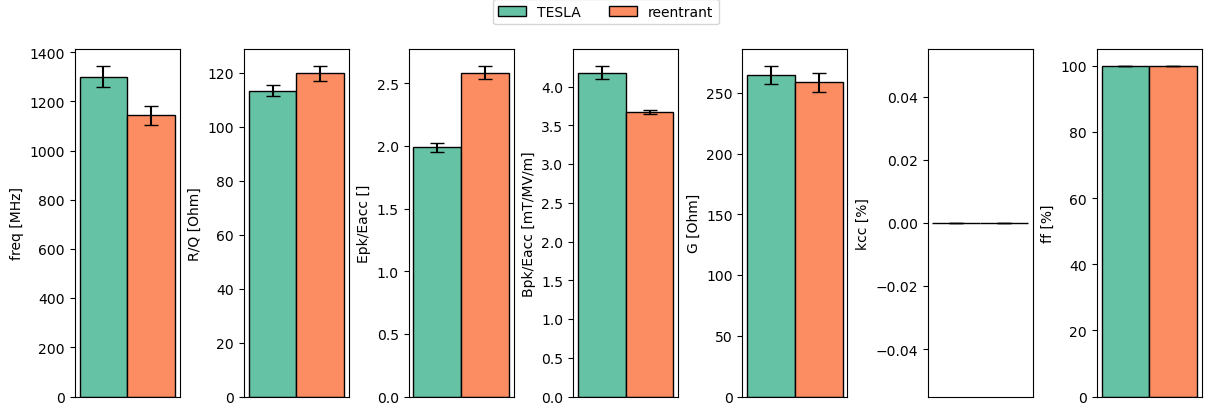

In [3]:
cavs.plot_compare_fm_bar(uq=True)

In [4]:
reentrant_mid_cell.inspect()

Output()